
About Dataset https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Library

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix


Importing Dataset

In [4]:
data = pd.read_csv('/content/drive/MyDrive/kecerdasan buatan/data.csv')

Exploratory Data

In [5]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [6]:
data.shape

(569, 33)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
# Check Duplication
data.duplicated().sum()

0

Handling Missing Value

In [9]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
data.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

- Dropping the id and Unnamed: 32 columns which will not provide any information for our model

In [11]:
data = data.drop(['id','Unnamed: 32'], axis= 1)

Mengubah nama kolom diagnostik menjadi target

In [12]:
data = data.rename(columns={'diagnosis' : 'target'})

mengubah data Taget dalam himpunan data. Saya mengubah ganas menjadi 1 dan jinak menjadi 0

In [13]:
data.target.replace({'M' : '1','B': '0'},inplace=True)

In [14]:
# Converting target type to int64
data.target = data.target.astype('float64')

In [15]:
data.head()

target  radius_mean  texture_mean  perimeter_mean  area_mean  \
0     1.0        17.99         10.38          122.80     1001.0   
1     1.0        20.57         17.77          132.90     1326.0   
2     1.0        19.69         21.25          130.00     1203.0   
3     1.0        11.42         20.38           77.58      386.1   
4     1.0        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [16]:
data.tail()

target  radius_mean  texture_mean  perimeter_mean  area_mean  \
564     1.0        21.56         22.39          142.00     1479.0   
565     1.0        20.13         28.25          131.20     1261.0   
566     1.0        16.60         28.08          108.30      858.1   
567     1.0        20.60         29.33          140.10     1265.0   
568     0.0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
564                0.2216          0.2060                  0.07115  
565                0.1628          0.2572                  0.06637  
566                0.1418          0.2218                  0.07820  
567                0.2650          0.4087                  0.12400  
568                0.0000          0.2871                  0.07039  

[5 rows x 31 columns]

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    float64
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Data Visualization

In [18]:
# Check statistic of dataset
data.describe().T

count        mean         std         min  \
target                   569.0    0.372583    0.483918    0.000000   
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
target                     0.000000    0.000000     1.000000     1.00000  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave points_mean        0.020310    0.033500     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave points_se          0.007638    0.010930     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.72000

<Axes: >

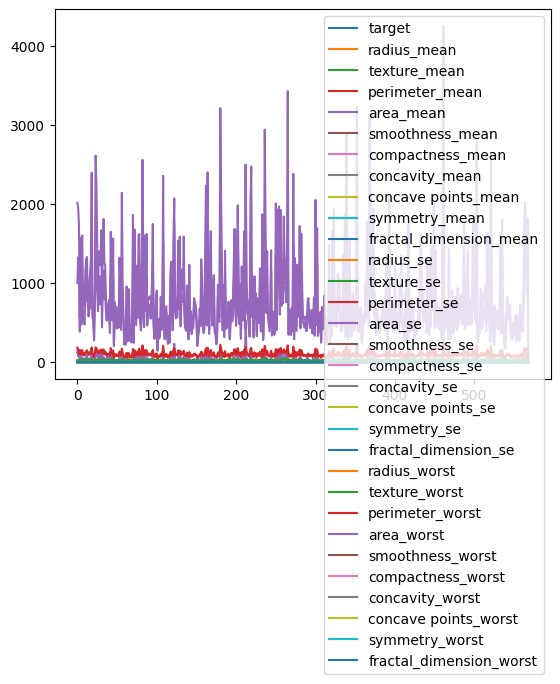

In [19]:
# @title
import matplotlib.pyplot as plt
%matplotlib inline
data.plot()

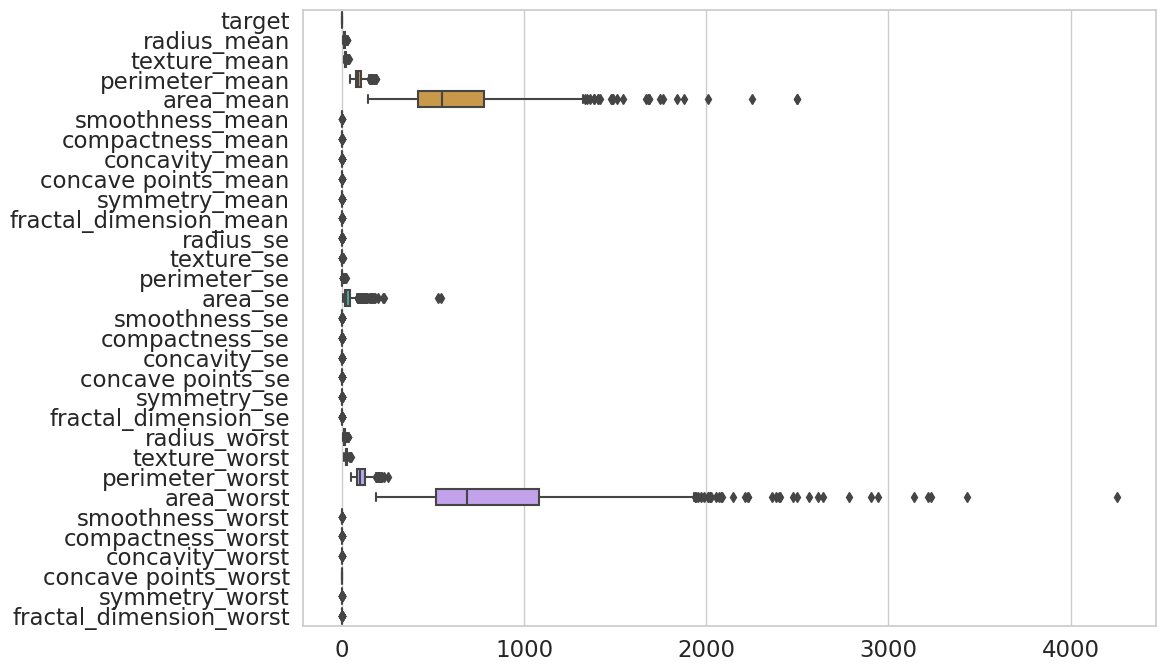

In [20]:
# @title
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(data)
sns.boxplot(data=data, orient="h");

Removing the outliers using IQR

In [21]:
# @title
import sklearn

# IQR radius_mean
Q1 = np.percentile(data['radius_mean'], 25,
                   method = 'midpoint')

Q3 = np.percentile(data['radius_mean'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", data.shape)

Old Shape:  (569, 31)


In [22]:
# @title
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = data[data['radius_mean'] > upper].index
outliers_lower = data[data['radius_mean'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
data.drop(outliers, inplace=True)

print("New Shape: ", data.shape)

New Shape:  (555, 31)


In [23]:
# @title
import sklearn

# IQR perimeter_mean
Q1 = np.percentile(data['texture_mean'], 25,
                   method = 'midpoint')

Q3 = np.percentile(data['texture_mean'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", data.shape)

Old Shape:  (555, 31)


In [24]:
# @title
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = data[data['texture_mean'] > upper].index
outliers_lower = data[data['texture_mean'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
data.drop(outliers, inplace=True)

print("New Shape: ", data.shape)

New Shape:  (548, 31)


In [25]:
# @title
import sklearn

# IQR perimeter_mean
Q1 = np.percentile(data['perimeter_mean'], 25,
                   method = 'midpoint')

Q3 = np.percentile(data['perimeter_mean'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", data.shape)

Old Shape:  (548, 31)


In [26]:
# @title
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = data[data['perimeter_mean'] > upper].index
outliers_lower = data[data['perimeter_mean'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
data.drop(outliers, inplace=True)

print("New Shape: ", data.shape)

New Shape:  (546, 31)


In [27]:
# @title
import sklearn

# IQR area_mean
Q1 = np.percentile(data['area_mean'], 25,
                   method = 'midpoint')

Q3 = np.percentile(data['area_mean'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", data.shape)

Old Shape:  (546, 31)


In [28]:
# @title
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = data[data['area_mean'] > upper].index
outliers_lower = data[data['area_mean'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
data.drop(outliers, inplace=True)

print("New Shape: ", data.shape)

New Shape:  (512, 31)


In [29]:
# @title
import sklearn

# IQR area_se
Q1 = np.percentile(data['area_se'], 25,
                   method = 'midpoint')

Q3 = np.percentile(data['area_se'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", data.shape)

Old Shape:  (512, 31)


In [30]:
# @title
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = data[data['area_se'] > upper].index
outliers_lower = data[data['area_se'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
data.drop(outliers, inplace=True)

print("New Shape: ", data.shape)

New Shape:  (460, 31)


In [31]:
# @title
import sklearn

# IQR radius_worst
Q1 = np.percentile(data['radius_worst'], 25,
                   method = 'midpoint')

Q3 = np.percentile(data['radius_worst'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", data.shape)

Old Shape:  (460, 31)


In [32]:
# @title
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = data[data['radius_worst'] > upper].index
outliers_lower = data[data['radius_worst'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
data.drop(outliers, inplace=True)

print("New Shape: ", data.shape)

New Shape:  (455, 31)


In [33]:
# @title
import sklearn

# IQR texture_worst
Q1 = np.percentile(data['texture_worst'], 25,
                   method = 'midpoint')

Q3 = np.percentile(data['texture_worst'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", data.shape)

Old Shape:  (455, 31)


In [34]:
# @title
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = data[data['texture_worst'] > upper].index
outliers_lower = data[data['texture_worst'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
data.drop(outliers, inplace=True)

print("New Shape: ", data.shape)

New Shape:  (453, 31)


In [35]:
# @title
import sklearn

# IQR perimeter_worst
Q1 = np.percentile(data['perimeter_worst'], 25,
                   method = 'midpoint')

Q3 = np.percentile(data['perimeter_worst'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", data.shape)

Old Shape:  (453, 31)


In [36]:
# @title
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = data[data['perimeter_worst'] > upper].index
outliers_lower = data[data['perimeter_worst'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
data.drop(outliers, inplace=True)

print("New Shape: ", data.shape)

New Shape:  (449, 31)


In [37]:
# @title
import sklearn

# IQR area_worst
Q1 = np.percentile(data['area_worst'], 25,
                   method = 'midpoint')

Q3 = np.percentile(data['area_worst'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", data.shape)

Old Shape:  (449, 31)


In [38]:
# @title
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = data[data['area_worst'] > upper].index
outliers_lower = data[data['area_worst'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
data.drop(outliers, inplace=True)

print("New Shape: ", data.shape)

New Shape:  (436, 31)


Analysis

In [39]:
# I looked at how many benign and malignant yields there are.
data.target.value_counts()

0.0    354
1.0     82
Name: target, dtype: int64

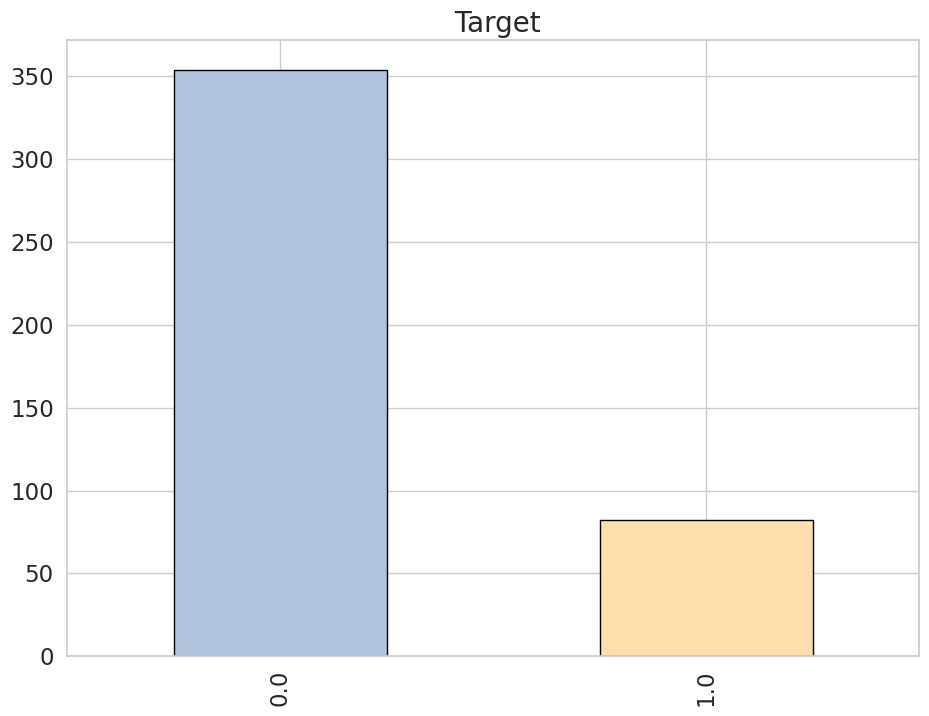

In [40]:
# visualized target data in the dataset.
data['target'].value_counts().plot(kind='bar',edgecolor='black',color=['lightsteelblue','navajowhite'])
plt.title(" Target",fontsize=20)
plt.show()

0-->jinak
1-->ganas


In [41]:
# Correlation Analysis
cor = data.corr()
cor

target  radius_mean  texture_mean  perimeter_mean  \
target                   1.000000     0.489374      0.297574        0.525733   
radius_mean              0.489374     1.000000      0.117304        0.995794   
texture_mean             0.297574     0.117304      1.000000        0.124709   
perimeter_mean           0.525733     0.995794      0.124709        1.000000   
area_mean                0.512800     0.993511      0.125453        0.989394   
smoothness_mean          0.313401    -0.031562     -0.123068        0.022504   
compactness_mean         0.499613     0.236042      0.085123        0.319075   
concavity_mean           0.573182     0.325247      0.136128        0.398338   
concave points_mean      0.676150     0.545221      0.078006        0.607581   
symmetry_mean            0.270089    -0.080764      0.007992       -0.033221   
fractal_dimension_mean   0.112609    -0.418295     -0.064461       -0.349677   
radius_se                0.305477     0.134063      0.171816        0.156640   
texture_se              -0.059545    -0.291741      0.437100       -0.287394   
perimeter_se             0.335793     0.179161      0.197837        0.216644   
area_se                  0.502964     0.500984      0.211105        0.519592   
smoothness_se           -0.039333    -0.407119      0.067442       -0.380906   
compactness_se           0.220030     0.003107      0.132606        0.071003   
concavity_se             0.158083    -0.001247      0.084371        0.048964   
concave points_se        0.258105     0.155660      0.064107        0.210449   
symmetry_se             -0.011862    -0.311431      0.063704       -0.285683   
fractal_dimension_se     0.060782    -0.209176      0.031712       -0.155250   
radius_worst             0.615124     0.959110      0.153891        0.961877   
texture_worst            0.381806     0.129862      0.907301        0.138868   
perimeter_worst          0.643602     0.944423      0.164937        0.958069   
area_worst               0.643915     0.946429      0.161589        0.949373   
smoothness_worst         0.419570    -0.062646     -0.011423       -0.011942   
compactness_worst        0.562348     0.274071      0.152185        0.345955   
concavity_worst          0.569179     0.311052      0.155851        0.377151   
concave points_worst     0.681367     0.529931      0.113010        0.588355   
symmetry_worst           0.447978     0.079185      0.062973        0.119075   
fractal_dimension_worst  0.388671    -0.094417      0.054897       -0.024744   

                         area_mean  smoothness_mean  compactness_mean  \
target                    0.512800         0.313401          0.499613   
radius_mean               0.993511        -0.031562          0.236042   
texture_mean              0.125453        -0.123068          0.085123   
perimeter_mean            0.989394         0.022504          0.319075   
area_mean                 1.000000        -0.039886          0.229698   
smoothness_mean          -0.039886         1.000000          0.651828   
compactness_mean          0.229698         0.651828          1.000000   
concavity_mean            0.335134         0.441873          0.849774   
concave points_mean       0.545862         0.579157          0.822596   
symmetry_mean            -0.080091         0.531733          0.538565   
fractal_dimension_mean   -0.410820         0.620490          0.684766   
radius_se                 0.159911         0.281671          0.298338   
texture_se               -0.279508         0.026376         -0.037262   
perimeter_se              0.201123         0.264697          0.426372   
area_se                   0.525378         0.231535          0.341364   
smoothness_se            -0.374326         0.343306          0.175366   
compactness_se            0.011487         0.264430          0.737983   
concavity_se              0.013982         0.172385          0.535077   
concave points_se         0.159860         0.372260          0.637827   
symmet

CORRELATION MATRIX

In [42]:
corr_data = data
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

# Model

In [43]:
# Splitting data
x= data.drop('target',axis=1)
y= data['target']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=101)

In [45]:
s= StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.fit_transform(x_test)

In [46]:
algorithm = ['KNeighborsClassifier','RandomForestClassifier','DecisionTreeClassifier','GaussianNB','LogisticRegression']
Accuracy=[]

In [47]:
def all(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)

    acc=accuracy_score(y_test,pred)
    Accuracy.append(acc)

    # confusion matrix without Normalization
    print('confusion matrix')
    # Calculate confusion matrix
    cm = confusion_matrix(y_test,pred)
    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d',cmap=['lightsteelblue','navajowhite'])
    plt.title('Confusion matrix')
    plt.xlabel('Predcted lablel')
    plt.ylabel('True lable')
    plt.show()

    # confusion matrix without Normalization
    print('Normalized confusion matrix')
    # Calculate confusion matrix
    cm1 = confusion_matrix(y_test,pred, normalize='true')
    # Plot the confusion matrix
    sns.heatmap(cm1, annot=True,cmap=['lightsteelblue','navajowhite'])
    plt.title('Normalized Confusion  matrix')
    plt.xlabel('Predcted lablel')
    plt.ylabel('True lable')
    plt.show()

    # print Confusion matrix, Classification report and accuracy report
    print(cm)
    print(classification_report(y_test,pred))
    print('accuracy_score : ' , acc)


### KNN

confusion matrix


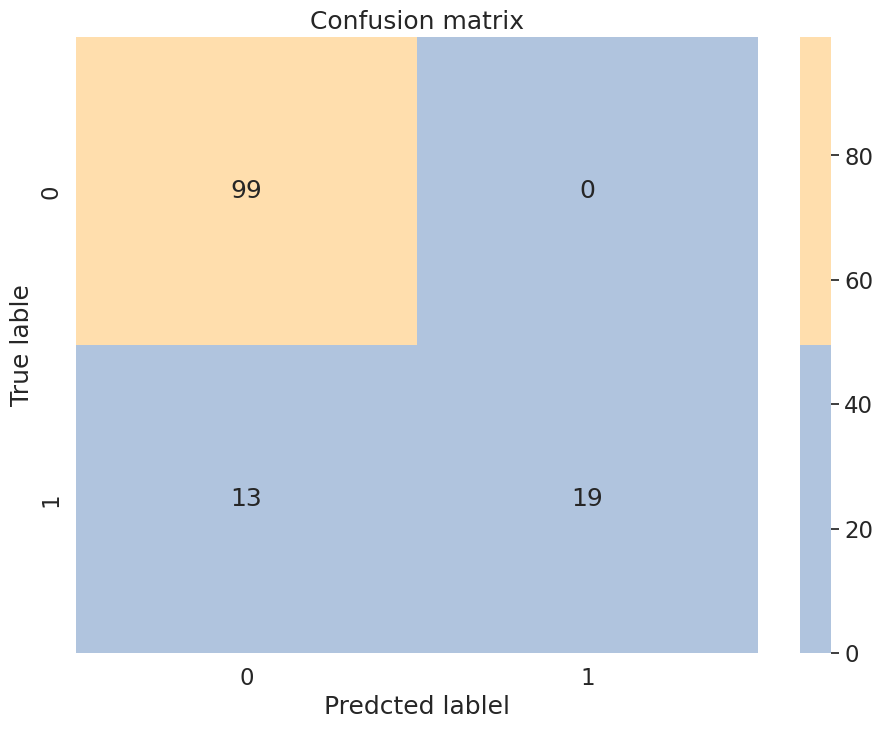

Normalized confusion matrix


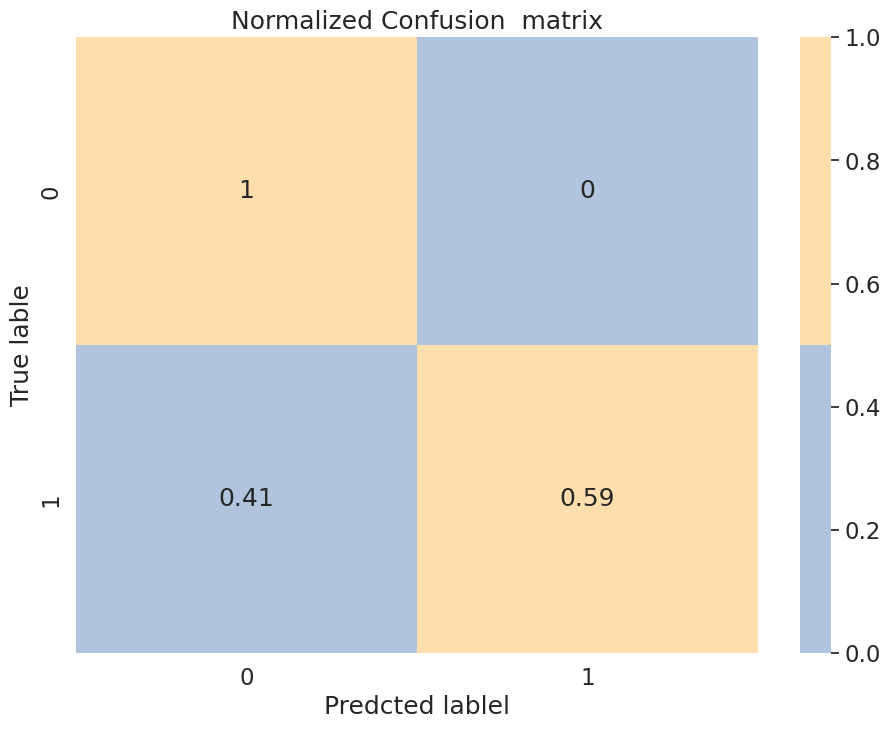

[[99  0]
 [13 19]]
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94        99
         1.0       1.00      0.59      0.75        32

    accuracy                           0.90       131
   macro avg       0.94      0.80      0.84       131
weighted avg       0.91      0.90      0.89       131

accuracy_score :  0.9007633587786259


In [48]:
model_1 =KNeighborsClassifier(n_neighbors=2)
all(model_1)

### RandomForest

In [49]:
model_2= RandomForestClassifier(n_estimators=100,random_state=0)
all(model_2)

confusion matrix


Normalized confusion matrix


[[99  0]
 [ 9 23]]
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        99
         1.0       1.00      0.72      0.84        32

    accuracy                           0.93       131
   macro avg       0.96      0.86      0.90       131
weighted avg       0.94      0.93      0.93       131

accuracy_score :  0.9312977099236641


### DecisionTree

confusion matrix


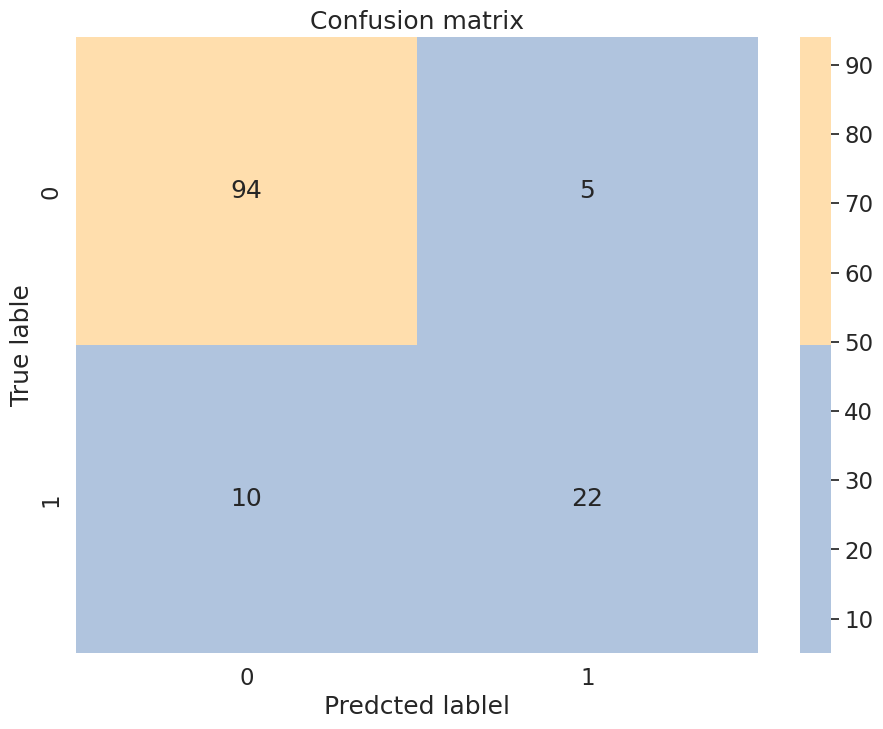

Normalized confusion matrix


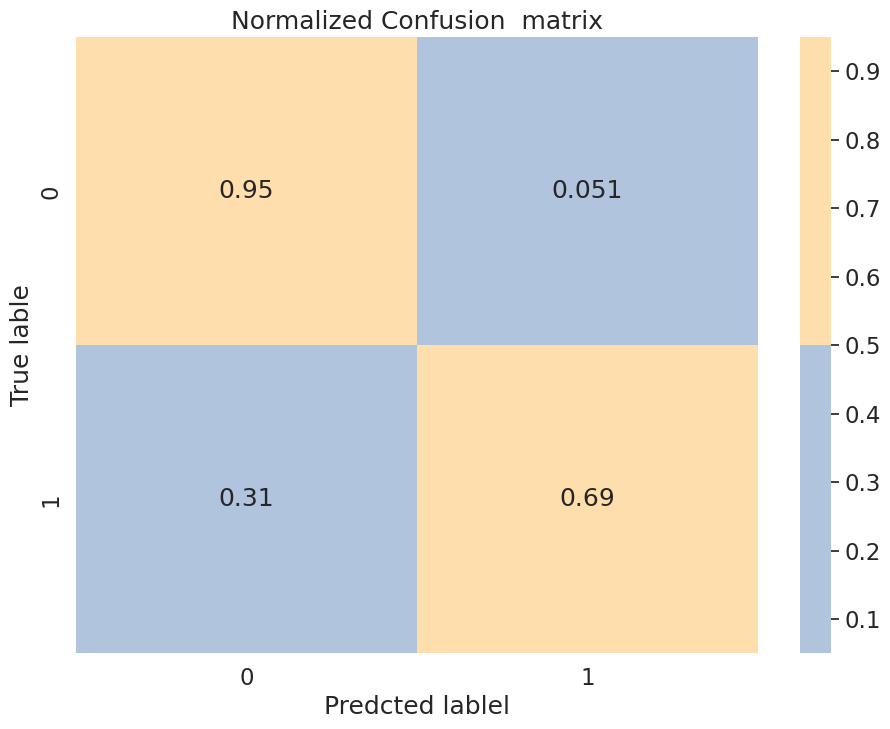

[[94  5]
 [10 22]]
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93        99
         1.0       0.81      0.69      0.75        32

    accuracy                           0.89       131
   macro avg       0.86      0.82      0.84       131
weighted avg       0.88      0.89      0.88       131

accuracy_score :  0.8854961832061069


In [50]:
model_3 = DecisionTreeClassifier(random_state=42)
all(model_3)

### Naive_bayes

confusion matrix


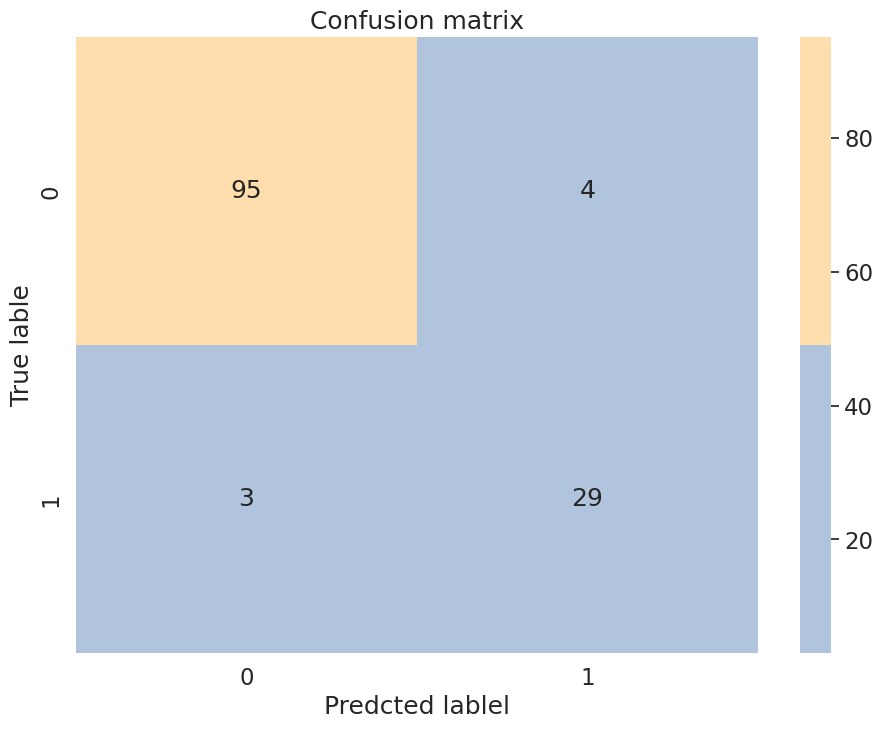

Normalized confusion matrix


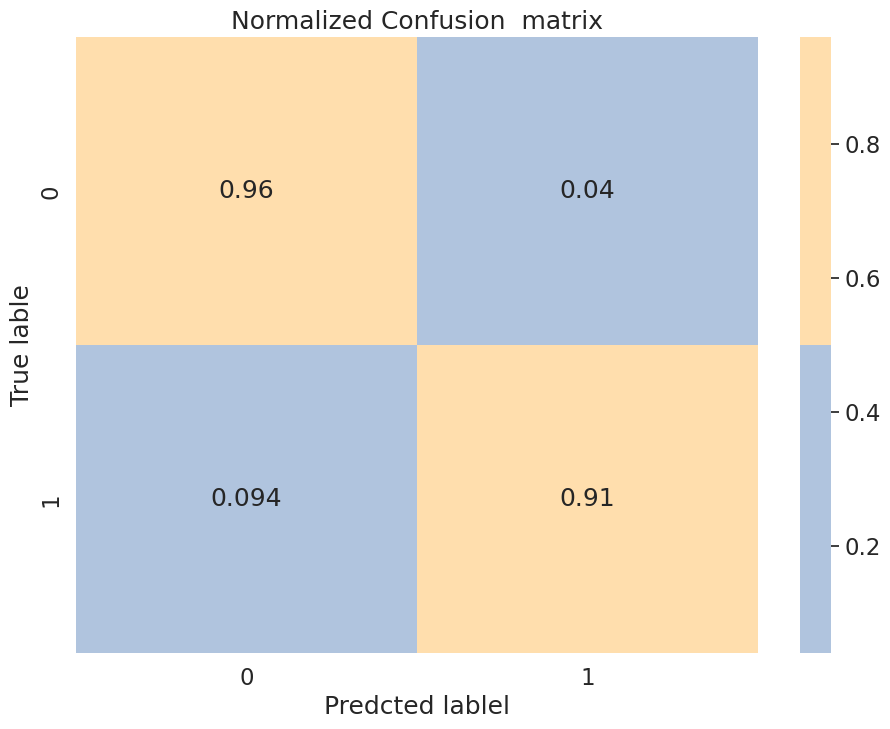

[[95  4]
 [ 3 29]]
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96        99
         1.0       0.88      0.91      0.89        32

    accuracy                           0.95       131
   macro avg       0.92      0.93      0.93       131
weighted avg       0.95      0.95      0.95       131

accuracy_score :  0.9465648854961832


In [51]:
model_4 = GaussianNB()
all(model_4)

### Logistic Regression

confusion matrix


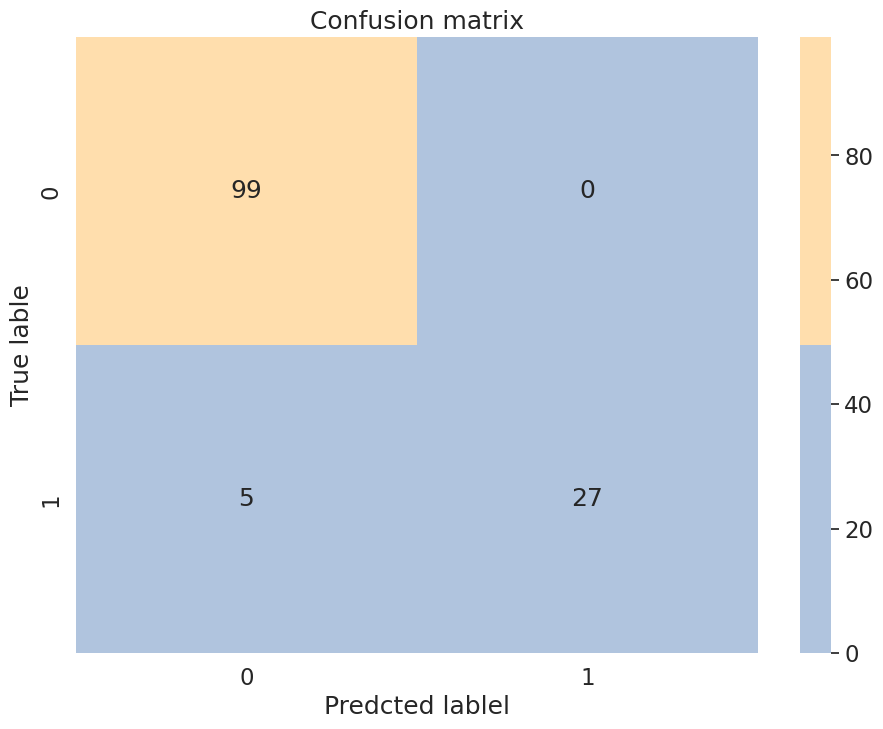

Normalized confusion matrix


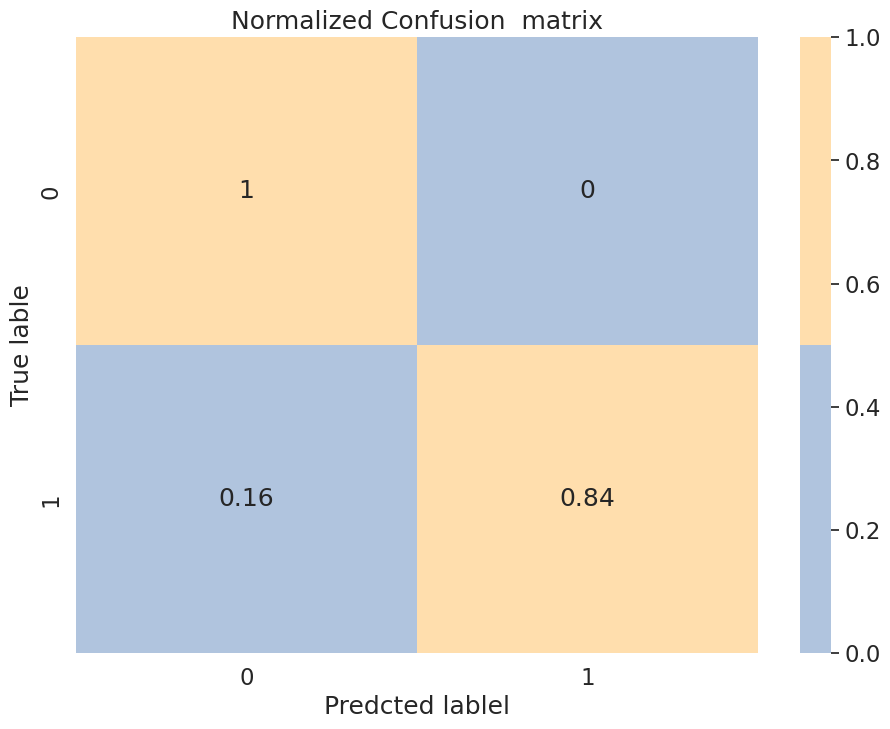

[[99  0]
 [ 5 27]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        99
         1.0       1.00      0.84      0.92        32

    accuracy                           0.96       131
   macro avg       0.98      0.92      0.95       131
weighted avg       0.96      0.96      0.96       131

accuracy_score :  0.9618320610687023


In [52]:
model_5 = LogisticRegression()
all(model_5)

In [53]:
df = pd.DataFrame({'Algorithm':algorithm,'Accuracy':Accuracy })
df

Algorithm  Accuracy
0    KNeighborsClassifier  0.900763
1  RandomForestClassifier  0.931298
2  DecisionTreeClassifier  0.885496
3              GaussianNB  0.946565
4      LogisticRegression  0.961832

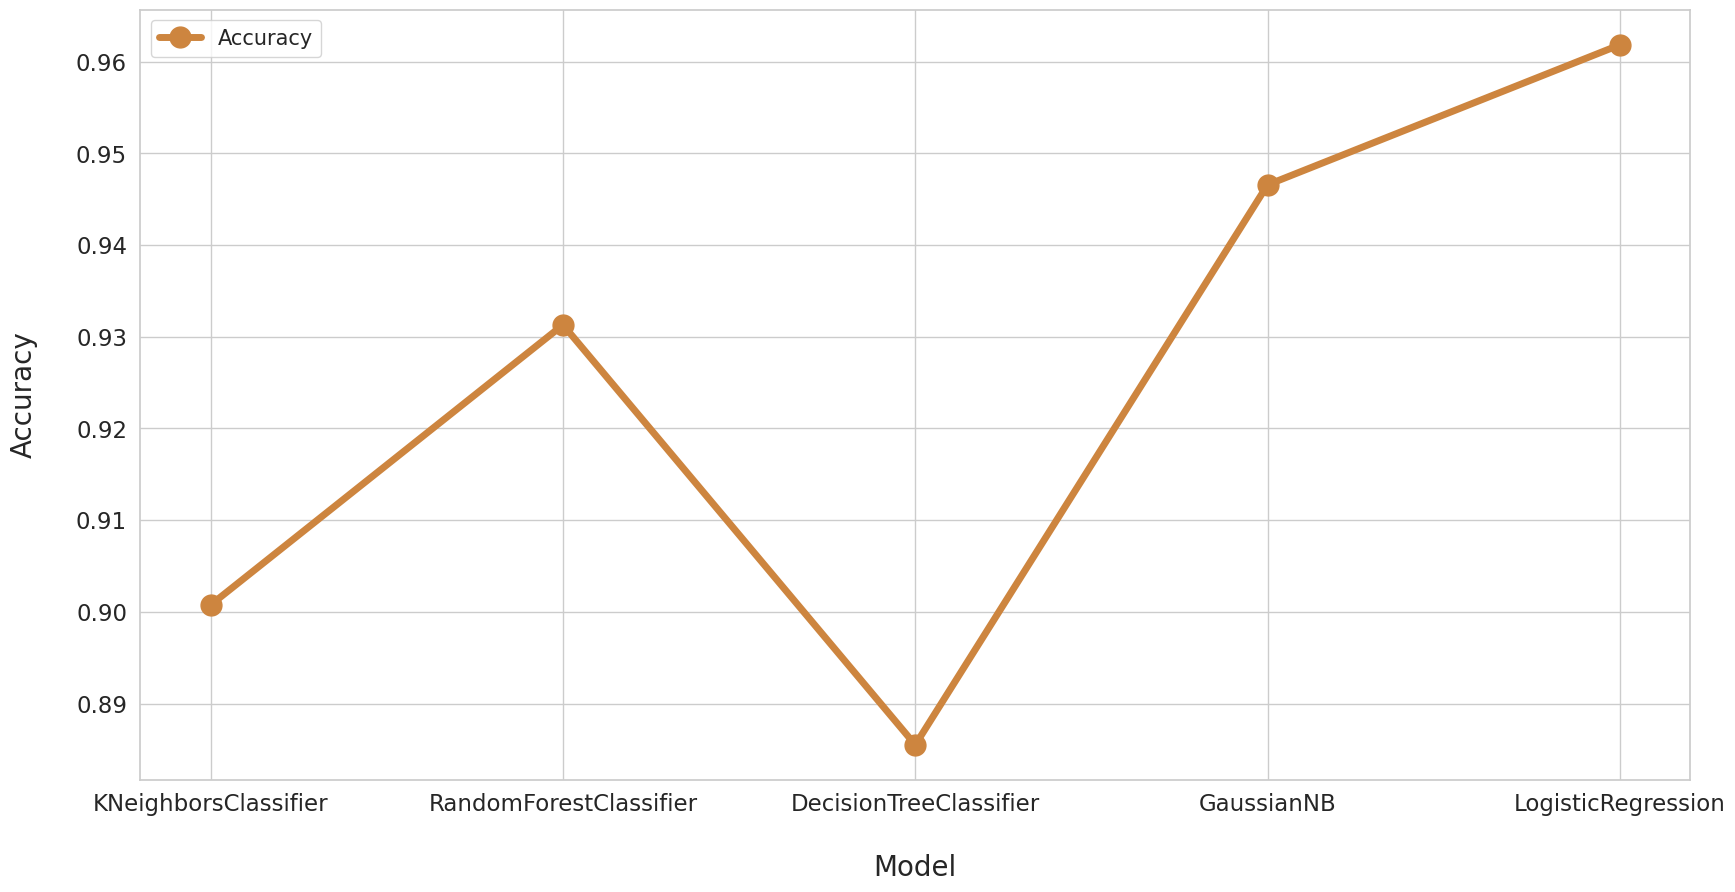

In [54]:
fig = plt.figure(figsize=(20,10))
plt.plot(df.Algorithm,df.Accuracy,label='Accuracy',lw=5,color='peru',marker='o',markersize = 15)
plt.legend(fontsize=15)
plt.xlabel('\nModel',fontsize= 20)
plt.ylabel('Accuracy\n',fontsize= 20)
plt.show()